In [1]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MinMaxScaler

from nirs4all.dataset import DatasetConfigs
from nirs4all.operators.transformations import *
from nirs4all.pipeline import PipelineConfigs, PipelineRunner
from sklearn.ensemble import RandomForestRegressor

x_scaler = MinMaxScaler() # StandardScaler(), RobustScaler(), QuantileTransformer(), PowerTransformer(), LogTransform()
y_scaler = MinMaxScaler()
list_of_preprocessors = [ Detrend, FirstDerivative, SecondDerivative, Gaussian, StandardNormalVariate, SavitzkyGolay, Haar, MultiplicativeScatterCorrection]
splitting_strategy = ShuffleSplit(n_splits=3, test_size=.25)
dataset_folder = '../../sample_data/regression'

pipeline = [
    # "chart_2d",
    x_scaler,
    # "chart_3d",
    {"y_processing": y_scaler},
    {"feature_augmentation": { "_or_": list_of_preprocessors, "size":[1,(1,2)], "count":5 }}, # Generate all elements of size 1 and of order 1 or 2 (ie. "Gaussian", ["SavitzkyGolay", "Log"], etc.)
    splitting_strategy,
]

for i in range(10, 30, 10):
    model = {
        "name": f"PLS-{i}_cp",
        "model": PLSRegression(n_components=i)
    }
    pipeline.append(model)

pipeline_config = PipelineConfigs(pipeline, "pipeline_Q1")
dataset_config = DatasetConfigs(dataset_folder)

# Create pipeline
runner = PipelineRunner(save_files=True)
run_predictions, other_predictions = runner.run(pipeline_config, dataset_config)

🚀 Starting pipeline run with 5 pipeline configuration(s) on 1 dataset configuration(s) (5 total runs).
✅ Loaded dataset 'regression' with 130 training and 59 test samples.
📥 Loaded 90 predictions from results\regression\regression_predictions.json
🚀 Starting pipeline config_pipeline_Q1_201ec0 on dataset regression
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
🔷 Step 1: {'class': 'sklearn.preprocessing._data.MinMaxScaler', '_runtime_instance': MinMaxScaler()}
🔹 Executing controller TransformerMixinController with operator MinMaxScaler
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
🔷 Step 2: {'y_processing': {'class': 'sklearn.preprocessing._data.MinMaxScaler', '_runtime_instance': Mi

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1. PLS-10_cp_8 - config_pipeline_Q1_201ec0 - RMSE: 14.883397, R²: 0.365375, MAE: 10.601266, MSE: 221.515492
2. PLS-10_cp_11 - config_pipeline_Q1_463cfe - RMSE: 15.340343, R²: 0.437480, MAE: 12.202131, MSE: 235.326109
3. PLS-20_cp_20 - config_pipeline_Q1_463cfe - RMSE: 15.395801, R²: 0.433405, MAE: 12.260458, MSE: 237.030697
4. PLS-20_cp_17 - config_pipeline_Q1_201ec0 - RMSE: 15.684369, R²: 0.295230, MAE: 11.061698, MSE: 245.999442
5. PLS-10_cp_5 - config_pipeline_Q1_8d28df - RMSE: 15.870297, R²: 0.159885, MAE: 13.200329, MSE: 251.866339


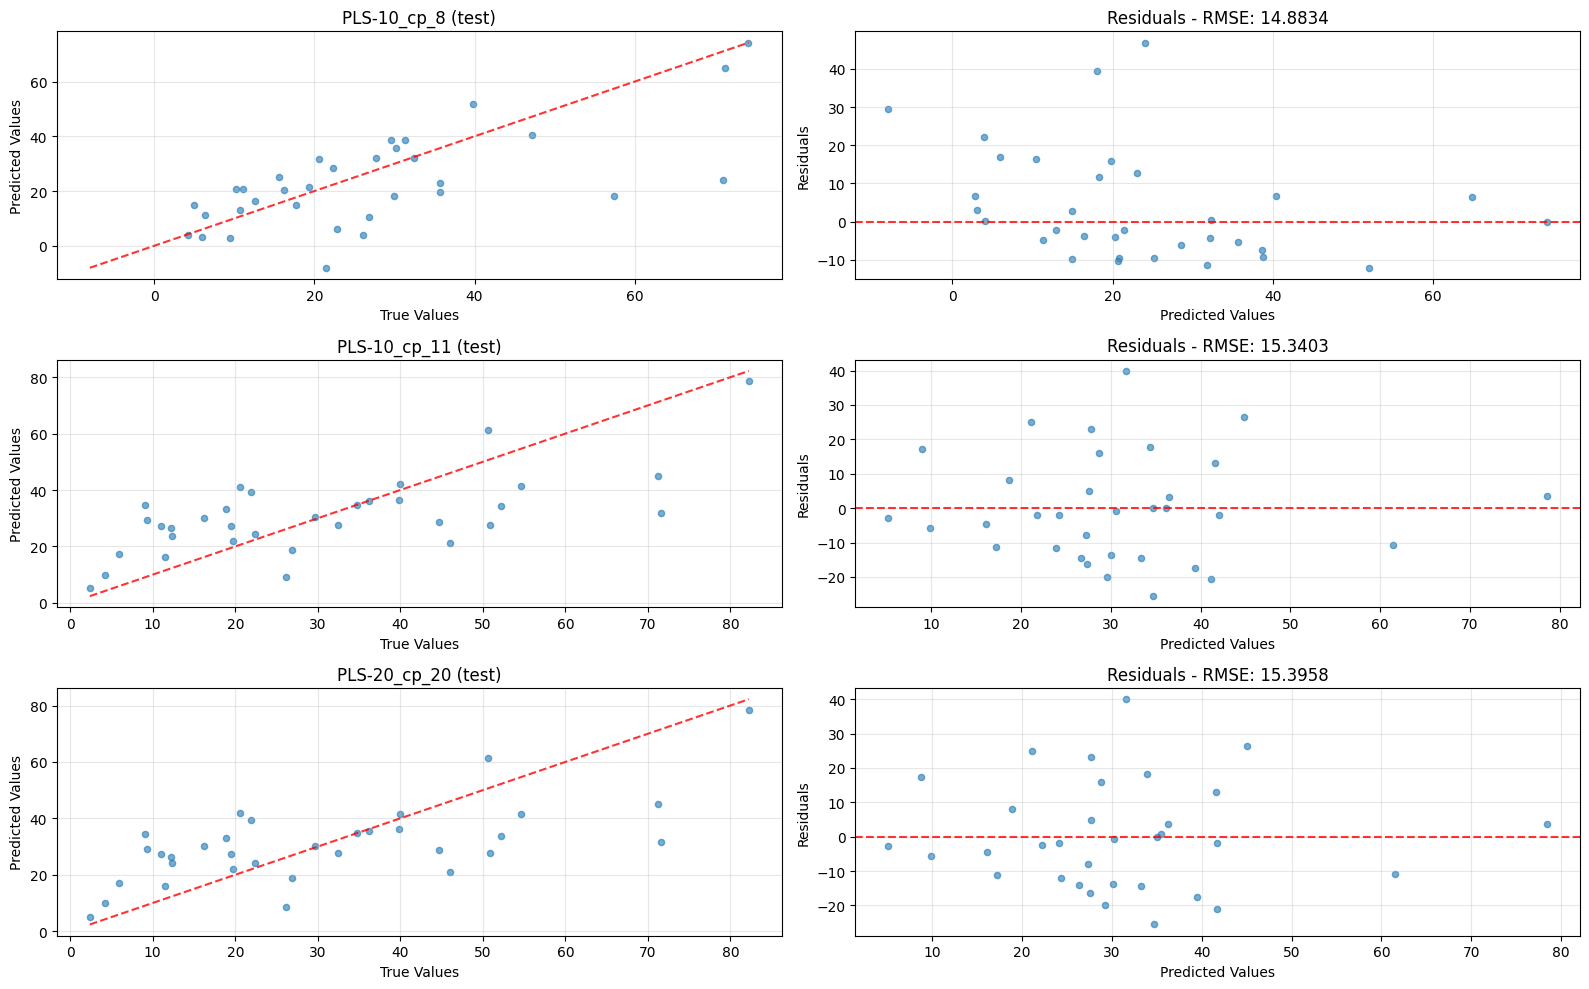

In [3]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from nirs4all.dataset.prediction_analyzer import PredictionAnalyzer

analyzer = PredictionAnalyzer(run_predictions)

top_5 = analyzer.get_top_k(5, 'mse')
for i, model in enumerate(top_5, 1):
    # Use enhanced_model_name which includes custom names when available
    enhanced_name = model.get('enhanced_model_name', model.get('real_model', 'unknown'))
    pipeline_path = model.get('path', '')

    # Extract config ID from pipeline path or key
    config_id = "unknown"
    if 'config_' in pipeline_path:
        config_part = pipeline_path.split('config_')[1].split('/')[0] if '/' in pipeline_path else pipeline_path.split('config_')[1]
        config_id = f"config_{config_part}"

    print(f"{i}. {enhanced_name} - {config_id} - RMSE: {model['metrics']['rmse']:.6f}, R²: {model['metrics']['r2']:.6f}, MAE: {model['metrics']['mae']:.6f}, MSE: {model['metrics']['mse']:.6f}")

# Plot top_k comparison with enhanced names in titles
fig = analyzer.plot_top_k_comparison(k=3, metric='rmse', partition_type='test')
plt.show()

In [2]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ShuffleSplit

from nirs4all.dataset import DatasetConfigs
from nirs4all.operators.transformations import *
from nirs4all.pipeline import PipelineConfigs, PipelineRunner

x_scaler = MinMaxScaler() # StandardScaler(), RobustScaler(), QuantileTransformer(), PowerTransformer(), LogTransform()
list_of_preprocessors = [ Detrend, FirstDerivative, SecondDerivative, Gaussian, StandardNormalVariate, SavitzkyGolay, Haar, MultiplicativeScatterCorrection]
splitting_strategy = ShuffleSplit(n_splits=3, test_size=.25)
dataset_folder = '../../sample_data/classification'

pipeline = [
    "chart_2d",
    x_scaler,
    "chart_3d",
    {"feature_augmentation": { "_or_": list_of_preprocessors, "size":[1,(1,2)], "count":5 }}, # Generate all elements of size 1 and of order 1 or 2 (ie. "Gaussian", ["SavitzkyGolay", "Log"], etc.)
    splitting_strategy,
]

for i in range(5, 20, 5):
    model = {
        "name": f"RF-depth-{i}",
        "model": RandomForestClassifier(max_depth=i)
    }
    pipeline.append(model)

pipeline_config = PipelineConfigs(pipeline, "pipeline_Q1")
dataset_config = DatasetConfigs(dataset_folder)

# Create pipeline
runner = PipelineRunner(save_files=False)
run_predictions, other_predictions = runner.run(pipeline_config, dataset_config)

🚀 Starting pipeline run with 5 pipeline configuration(s) on 1 dataset configuration(s) (5 total runs).
✅ Loaded dataset 'classification' with 48 training and 18 test samples.
📥 Loaded 270 predictions from results\classification\classification_predictions.json
🚀 Starting pipeline config_pipeline_Q1_7029e5 on dataset classification
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
🔷 Step 1: chart_2d
🔹 Executing controller SpectraChartController without operator
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
🔷 Step 2: {'class': 'sklearn.preprocessing._data.MinMaxScaler', '_runtime_instance': MinMaxScaler()}
🔹 Executing controller TransformerMixinController with operator MinMaxScaler
------

1. RF-depth-5_7 (RF-depth-5) - config_pipeline_Q1_7029e5 - Accuracy: 0.500000, F1: 0.480159, Precision: 0.555556, Recall: 0.500000
2. RF-depth-15_25 (RF-depth-15) - config_pipeline_Q1_2def44 - Accuracy: 0.500000, F1: 0.470833, Precision: 0.483333, Recall: 0.500000
3. RF-depth-15_28 (RF-depth-15) - config_pipeline_Q1_2def44 - Accuracy: 0.500000, F1: 0.472222, Precision: 0.516667, Recall: 0.500000
4. RF-depth-5_10 (RF-depth-5) - config_pipeline_Q1_7029e5 - Accuracy: 0.416667, F1: 0.387500, Precision: 0.428571, Recall: 0.416667
5. RF-depth-5_4 (RF-depth-5) - config_pipeline_Q1_8c7545 - Accuracy: 0.416667, F1: 0.321429, Precision: 0.284722, Recall: 0.416667


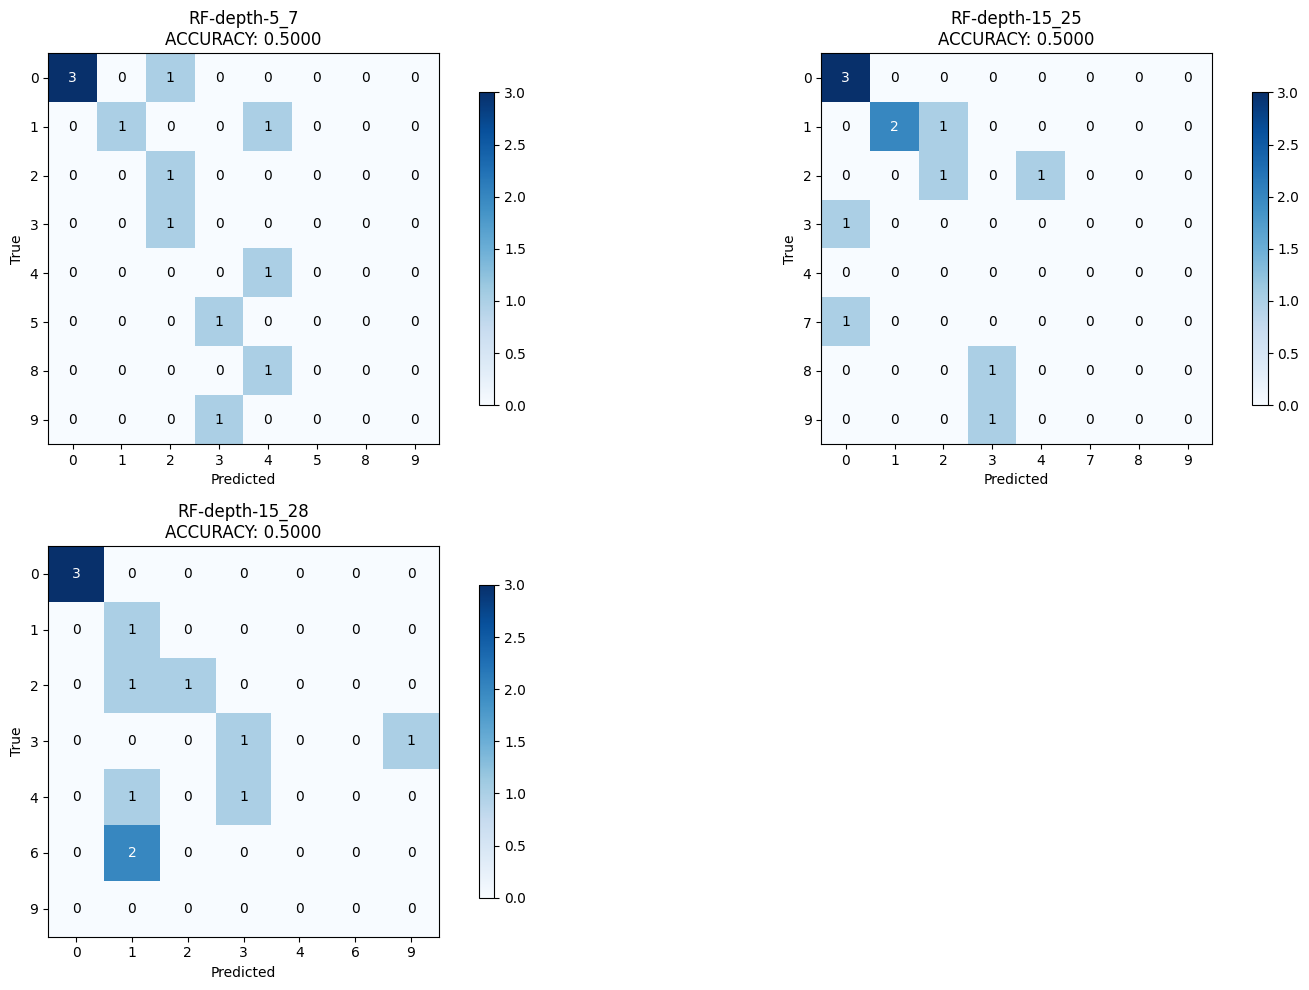

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from nirs4all.dataset.prediction_analyzer import PredictionAnalyzer

analyzer = PredictionAnalyzer(run_predictions)

top_5 = analyzer.get_top_k(5, 'accuracy')
for i, model in enumerate(top_5, 1):
    # Use enhanced_model_name which includes custom names when available
    enhanced_name = model.get('enhanced_model_name', model.get('real_model', 'unknown'))
    # canonical_name = model.get('canonical_model', 'unknown')
    pipeline_path = model.get('path', '')

    # Extract config ID from pipeline path or key
    config_id = "unknown"
    if 'config_' in pipeline_path:
        config_part = pipeline_path.split('config_')[1].split('/')[0] if '/' in pipeline_path else pipeline_path.split('config_')[1]
        config_id = f"config_{config_part}"

    print(f"{i}. {enhanced_name} - {config_id} - Accuracy: {model['metrics']['accuracy']:.6f}, F1: {model['metrics']['f1']:.6f}, Precision: {model['metrics']['precision']:.6f}, Recall: {model['metrics']['recall']:.6f}")

# Plot top_k comparison with enhanced names in titles
fig = analyzer.plot_top_k_confusionMatrix(k=3, metric='accuracy', partition_type='test')
plt.show()